In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the data
df=pd.read_csv('Add_sales_data_2018.csv')

Basic Information about the data

In [4]:
df.head()


,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [5]:
df.tail()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444
204,2017-12-08,287.55,289.90,285.05,288.05,288.45,5421.842


In [6]:
df.shape

(205, 7)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [8]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


#Checking if duplicates are present

In [9]:
df.duplicated().sum()

0

Checking if null values are present

In [10]:
df.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [11]:
df.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [35]:
df.rename({'Date' :'Date', 
            'Add1(in Thousands)' : 'Add1_in_Thousands', 
            'Add2(in Thousands)' : 'Add2_in_Thousands',
            'Add3(in Thousands)' : 'Add3_in_Thousands', 
            'Add4(in Thousands)' : 'Add4_in_Thousands', 
            'Add5(in Thousands)' : 'Add5_in_Thousands',
           'Profit_in_Thousands)' : 'Profit_in_Thousands'},inplace=True,axis=1)

In [36]:
df.columns

Index(['Date', 'Add1_in_Thousands', 'Add2_in_Thousands', 'Add3_in_Thousands',
       'Add4_in_Thousands', 'Add5_in_Thousands', 'Profit_in_Thousands'],
      dtype='object')

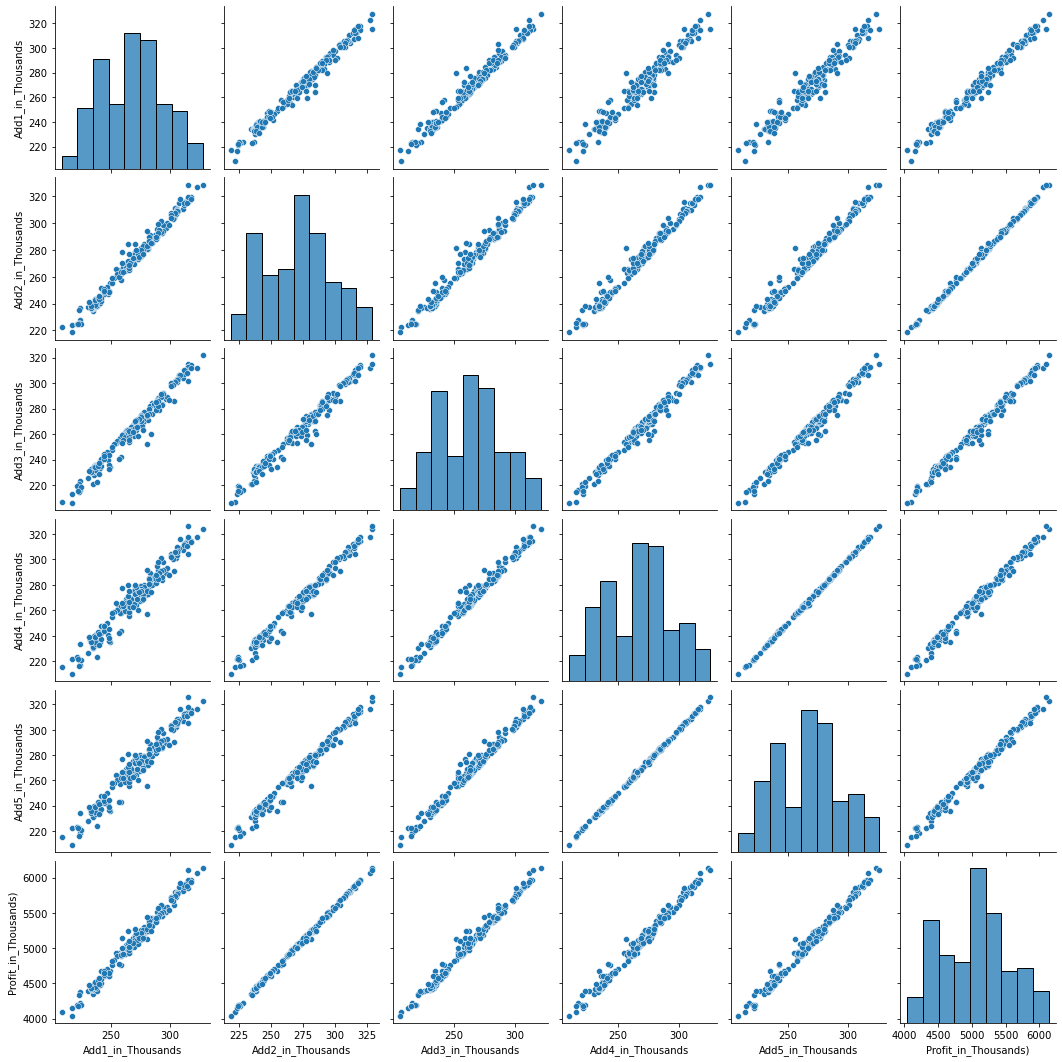

In [19]:
sns.pairplot(df)

# Relation Between Amount spent through 5 companies and Profit Generated

df_corr=df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(data=df_corr,annot=True,linewidths=0.2)
plt.title('Correlation between the features')

In [ ]:
From the above visualization we can infer that 5 companies are highly correlated with the profit.
Which means any increase in ad spend in any of the company will positively affect the profit generated

# Regression Model

Splitting the data for training and test


In [55]:
from sklearn.model_selection import train_test_split

X=df.drop(['Date','Profit_in_Thousands'],axis=1)
y=df['Profit_in_Thousands']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [57]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [58]:
prediction=lr.predict(X_test)

In [59]:
prediction

array([4178.008, 5004.282, 4617.695, 5146.949, 5065.652, 4465.95 ,
       6101.648, 4676.653, 4193.095, 5430.79 , 4404.686, 5107.437,
       5439.655, 5792.175, 5239.06 , 4898.776, 4979.399, 4461.325,
       4190.965, 5267.657, 4836.837, 5328.025, 4934.682, 5216.436,
       5034.726, 5244.097, 5359.346, 5378.379, 5134.657, 5384.175,
       4980.446, 5956.323, 5395.217, 5511.087, 4425.005, 5518.561,
       5580.775, 4760.877, 4418.709, 4569.293, 5234.487])

In [60]:
y_test

20     4178.008
68     5004.282
31     4617.695
151    5146.949
152    5065.652
23     4465.950
180    6101.648
94     4676.653
19     4193.095
106    5430.790
5      4404.686
165    5107.437
201    5439.655
171    5792.175
64     5239.060
89     4898.776
135    4979.399
34     4461.325
18     4190.965
163    5267.657
91     4836.837
162    5328.025
134    4934.682
150    5216.436
82     5034.726
124    5244.097
117    5359.346
114    5378.379
143    5134.657
159    5384.175
83     4980.446
182    5956.323
116    5395.217
110    5511.087
8      4425.005
104    5518.561
108    5580.775
55     4760.877
6      4418.709
98     4569.293
62     5234.487
Name: Profit_in_Thousands, dtype: float64

# Evaluating the metrics:

In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("MSE is :" , mean_squared_error(y_test,prediction))
print("MAE is :",mean_absolute_error(y_test,prediction))

MSE is : 1.0289319814684003e-24
MAE is : 7.763979161476216e-13


Observations
(1)From the ouput of y_test and predictions variables we can see that, the predicted values corresponding to x_test is
very much identical to the y_test.
(2)The MSE and MAE is very low, showing our model is very accurate in its predictions

# Predict the profit generated by the company

Predict the profit generated by the company, if they wish to spend the following amount for advertisement,


Add1(in Thousands) : 290
Add2(in Thousands) : 312
Add3(in Thousands) : 309
Add4(in Thousands) : 298
Add5(in Thousands) : 320

In [64]:
profit=lr.predict([[290,312,309,298,320]])
print("The predicted profit for the entered values of given ad spend is:",profit)

The predicted profit for the entered values of given ad spend is: [5820.06]


C:\Users\vivek\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
